In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
with open ('current_data.txt') as f:
    data = f.read() # Import data

In [3]:
lines = data.splitlines() # Process of the set
infections = []
for line in lines:
    [trash, number] = line.split('+')
    infections.append(int(number))

print(infections)

[0, 1, 0, 4, 1, 5, 6, 5, 9, 20, 17, 36, 21, 52, 61, 49, 68, 70, 111, 98, 115, 152, 150, 170, 168, 249, 224, 193, 256, 243, 392, 437, 244, 475, 311, 435, 357, 370, 380, 401, 318, 258, 270, 380, 336, 457, 334, 515, 306, 263, 313, 342, 381, 381, 344, 285, 316, 422, 300, 228, 270, 318, 313, 406, 311, 303, 337, 288, 345, 330, 556, 322, 411, 401, 241, 272, 356, 382, 471, 403, 471, 315, 361, 341, 443, 397, 352, 332, 412, 219, 375, 236, 292, 361, 362, 576, 575, 599, 400, 282, 359, 376, 440, 375, 396, 407, 450, 314, 352, 309, 311, 296, 300, 294, 289, 285, 319, 193, 247, 239, 382, 371, 259, 314, 231, 205, 257, 277, 262, 265, 305, 370, 299, 267, 264, 333, 353, 339, 358, 279, 399, 380, 418, 458, 584, 443, 337, 502, 512, 615, 657, 658, 548, 575, 680, 640, 726, 809, 843, 624, 619, 551, 715, 811, 832, 771, 594, 595, 597, 735, 767, 903, 900, 581, 548, 763, 729, 887, 791, 759, 631, 502, 550, 595, 612, 691, 567, 437, 302, 400, 421, 506, 594, 603, 502, 377, 605, 600, 837, 757, 1002, 910, 748, 711, 974, 1

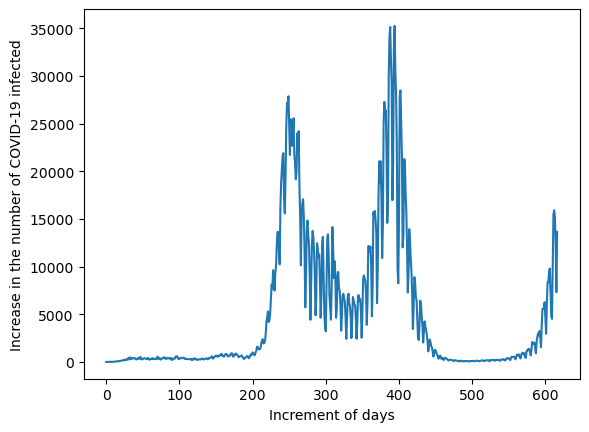

In [4]:
infections_np = np.asarray(infections) # Create a graph of Covid-19 infections in relation to the number of days
plt.plot(infections_np)
plt.xlabel("Increment of days")
plt.ylabel("Increase in the number of COVID-19 infected")
plt.show()

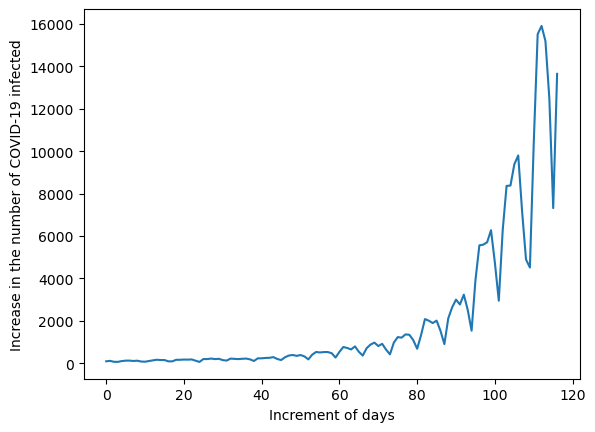

In [5]:
infections_from_550 = infections_np[500:] # Create a graph of Covid-19 infections in relation to the number of days since day 500
plt.plot(infections_from_550)
plt.xlabel("Increment of days")
plt.ylabel("Increase in the number of COVID-19 infected")
plt.show()

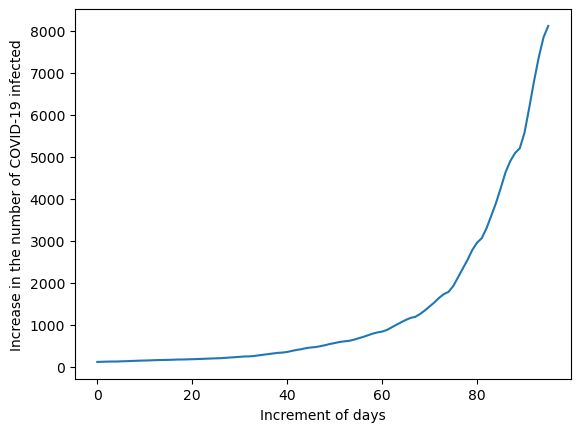

In [6]:
mean = [] 
for i in range(infections_from_550.shape[0]-21):
    #print(i)
    mean.append(infections_from_550[i:i+21].sum()/21) # Axis change to weeks, 21 n and represented as 3 weeks
plt.plot(mean)
plt.xlabel("Increment of days")
plt.ylabel("Increase in the number of COVID-19 infected")
plt.show()

In [7]:
def G(t, N, T, U):
    return N*(np.exp(-(np.exp(-(t-T)/U)))) # Mathematical function formula - Gompertz function, G(t), (Gompertz 1825)
def Gl(t, N, T, U):
    return np.log(N)-(np.exp(-(t-T)/U)) # Another function, which is the logarithm of the fractional change function
def Gll(t, T, U): # For a Gompertz distribution Gll(t) is a decaying exponential function with the same time constant U
    return(t-T)/U

In [8]:
logtotal1 = np.log(infections_np)
logtotal = logtotal1[550:]
loglogtotal = np.log(logtotal)
x_days = [i for i in range(1,len(loglogtotal)+1)]
pars, pcov = opt.curve_fit(Gll, x_days, loglogtotal) # The curve_fit function allows you to specify the range of fitting parameters U, T and N
#print(pars)
fitGll = Gll(x_days, *pars)
pars1, pcov1 = opt.curve_fit(Gl, x_days, logtotal, bounds=([0, -20000, 3500], [np.inf, 11000, 12000]))
#print(pars1)

C:\Users\HP\AppData\Local\Temp\ipykernel_15416\1888551926.py:1: RuntimeWarning: divide by zero encountered in log
  logtotal1 = np.log(infections_np)


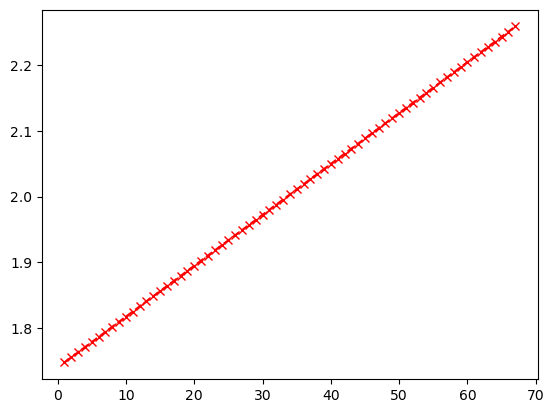

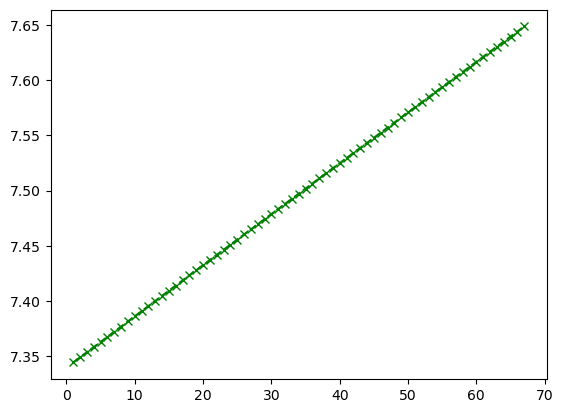

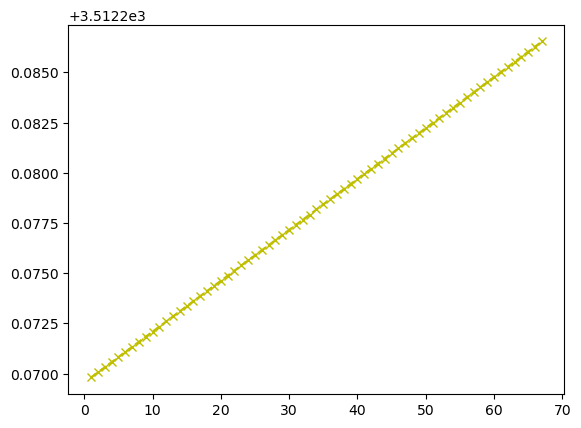

In [9]:
# The result of fitting the function
pars2, pcov2 = opt.curve_fit(G, x_days, infections_np[550:], bounds=([-100000, -5000, -5000],[30000000, 300000000, 400000000]))
#print(pars2)
plt.plot(x_days, Gll(x_days,*pars),'x--r')
plt.show()
plt.plot(x_days,Gl(x_days,*pars1),'x--g')
plt.show()
plt.plot(x_days,G(x_days,*pars2),'x--y')
plt.show()